第一题：

C:\Users\24116\AppData\Local\Temp\ipykernel_29004\1879942615.py:22: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask=imread('wordcloud_back.png'),


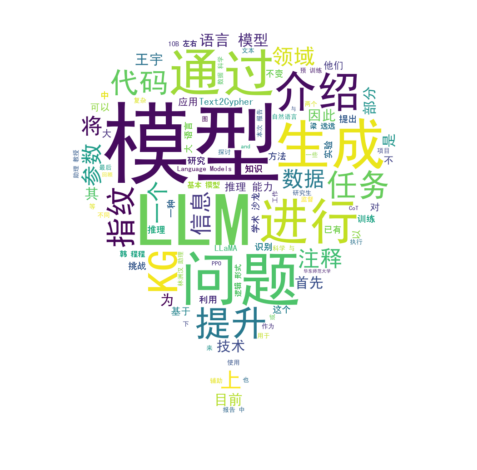

In [11]:
import os 
from os import path 
from wordcloud import WordCloud
from matplotlib import pyplot as plt 
import numpy as np
from PIL import Image 
import jieba 
from imageio import imread
# 获取当前文件路径 
d = path.dirname("D:\大学学习\数据科学导论\homework\week8") if "D:\大学学习\数据科学导论\homework\week8" in locals() else os.getcwd() 
# 获取文本txt 
text = open(path.join(d,'文本.txt'),encoding='utf-8').read() 
# 设置中文字体 
font_path = 'D:\大学学习\数据科学导论\homework\week8\my_font.ttf' # 字体路径 
# 精确切割中文字符 
text = ' '.join(jieba.lcut(text)) 
stopwords = ("的","和","了","在","并","该")
wc = WordCloud( 
    font_path = font_path, #字体路径 
    scale=2, 
    max_words = 100, #最多词个数 
    mask=imread('wordcloud_back.png'),
    max_font_size=100, #最大字号 
    background_color='white', #背景色 
    stopwords= stopwords
) 
wc.generate(text) 
# 显示图像 
plt.imshow(wc,interpolation='bilinear') 
plt.axis('off') 
plt.tight_layout() 
plt.show() 

第二题：

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
     'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?',
 ]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())
print(X.toarray())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


第三题：

In [30]:
from sklearn.datasets import fetch_20newsgroups 
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

#选取20个类中7种比较典型的类别进行实验
select = ['alt.atheism','comp.graphics','misc.forsale','rec.autos',
          'sci.crypt','soc.religion.christian','talk.politics.guns']
train=fetch_20newsgroups(subset='train',categories=select)
test=fetch_20newsgroups(subset='test',categories=select)

#train=fetch_20newsgroups(subset='train')
#test=fetch_20newsgroups(subset='test')

#将文章数据向量化（TF-IDF算法）
vectorizer = TfidfVectorizer() 
train_v=vectorizer.fit_transform(train.data)
test_v=vectorizer.transform(test.data)

print(train_v[0].toarray())

[[0. 0. 0. ... 0. 0. 0.]]


第四题：

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
# 我们选取三类作为实验
categories = ['alt.atheism', 'talk.religion.misc','comp.graphics', 'sci.space']
# 加载数据集
newsgroups_train = fetch_20newsgroups(subset='train',categories=categories)
# 提取tfidf特征
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(newsgroups_train.data)
# print(vectors.shape)
# print(vectors.nnz / float(vectors.shape[0]))

# MultinomialNB实现文本分类
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
# 加载测试集
newsgroups_test=fetch_20newsgroups(subset='test',categories=categories)
# 提取测试集tfidf特征
vectors_test=vectorizer.transform(newsgroups_test.data)
# 训练
clf=MultinomialNB(alpha=0.1)
clf.fit(vectors,newsgroups_train.target)

pred=clf.predict(vectors)
print("训练集的准确度：", accuracy_score(newsgroups_train.target,pred))

# 预测
pred=clf.predict(vectors_test)
print("测试集的准确度：", accuracy_score(newsgroups_test.target,pred))


(2034, 34118)
159.0132743362832
训练集的准确度： 0.9926253687315634
测试集的准确度： 0.8965262379896526
